## Numerisches Differenzieren

*Notebook erstellt am 11.09.2022 von C. Rockstuhl, überarbeitet von Y. Augenstein*

### Ableitungen erster Ordnung

In einer der ersten Vorlesung haben wir gelernt, dass der Differentialoperator definiert ist als der Grenzwert eines Differenzenoperators. Er kann entsprechend geschrieben werden als

$$
\frac{\mathrm{d}f(x)}{\mathrm{d}x}=\lim_{\Delta x \rightarrow 0} \frac{f(x+\Delta x)-f(x)}{\Delta x}=\lim_{\Delta x \rightarrow 0} \frac{f(x)-f(x-\Delta x)}{\Delta x}.
$$

Wir wollen diese Definition benutzen, um im Folgenden zu lernen, wie man numerisch differenziert ohne eine analytische Lösung bemühen zu müssen. Wir schauen uns das für ein sehr einfaches Beispiel einer sinusförmigen Funktion an.

$$
f(x)=\sin (x)
$$

und können das als eine Koordinate einer Kreisbahn verstehen, die wir in der Vorlesung gerade besprochen haben. Analytisch bekannt ist die Lösung der ersten und zweiten Ableitung

$$
f'(x)=\cos (x)
$$
und
$$
f''(x)=-\sin (x),
$$

gegen die wir numerische Näherungen dieser Ausdrücke immer vergleichen können.

Diese numerische Evaluierung von Differenzenquotienten mag bei der Berechnung von Geschwindigkeiten und Beschleunigungen vielleicht nicht immer notwendig sein. Aber wir werden auf dieses Wissen zu einem späteren Zeitpunkt zurückgreifen, wenn wir numerische Lösungen von Bewegungsgleichungen studieren. Dies sind Differentialgleichungen, die wir näherungsweise in der Zeit sich entwickeln lassen. Und für genau diese näherungsweise Berechnung benötigen wir die Näherung der Differentialgleichung durch eine Differenzengleichung, die wir dann entsprechend passend durchführen werden.

Als Zweites sei noch gesagt, dass das Konvergenzverhalten von verschiedenen Arten von Differenzenbildung im Allgemeinen wichtig ist. Genauso wie wir das schon diskutierten bei der Integralrechnung, ist es also nicht einfach nur unser Ziel, möglichst exakt zu rechnen, sondern möglichst exakt mit der kleinsten Anzahl an Rechenschritten zu rechnen. Dies reduziert den numerischen Aufwand insbesonders für komplexe Probleme.

Wir beginnen mit einer einfachen Evaluierung und Visualisierung der relevanten Funktion.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 51
a = 0
b = 4 * np.pi

x = np.linspace(a, b, N)
y = np.sin(x)

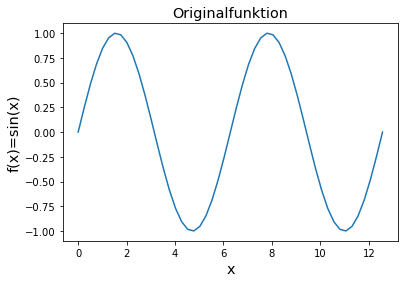

In [2]:
plt.title("Originalfunktion", size="x-large")
plt.ylabel("f(x)=sin(x)", size="x-large")
plt.xlabel("x", size="x-large")
plt.plot(x, y)
plt.show()

Jetz haben wir die Funktion bereits diskretisiert und an diesen diskreten Stützstellen evaluiert, um sie passend darzustellen. Zur näheren Illustration der Diskretisierung der Funktionswerte an Raumpunkten, soll uns das folgende Schema helfen:

<img src="Diskretisierung.png" alt="Diskretisierung von Funktionswerten" width="400"/>
<!--  ![Diskretisierung von Funktionswerten](Diskretisierung.png "Diskretisierung von Funktionswerten")-->


Wir benötigen also jetzt im Folgenden den Funktionswert an der Stelle, an dem die Ableitung ausgerechnet wird sowie den Funktionswert an einer um die Diskretisierung in die positive $x$-Richtung und in die negative $x$-Richtung verschobenen Stelle. Die Ableitung berechnet sich dann aus der Steigung der Funktion an dem Raumpunkt, einmal unter Berücksichtigung des Vorgängers und einmal unter Berücksichtigung des Nachfolgers. Man unterscheidet dann entsprechend zwischen einem Vorwärts- und einem Rückwärtsdifferenzenquotuenten. 

<img src="Ableitung.png" alt="Berechnung der Ableitung" width="400"/>
<!-- ![Berechnung der Ableitung](Ableitung.png "Berechnung der Ableitung") -->

Der Differentialoperator wird dann näherungsweise als Differenzenquotient berechnet. Man spricht hier von einer ersten Ordnung:

$$
\frac{\mathrm{d} f}{\mathrm{d} x}\approx\frac{\Delta f_1}{\Delta x}=\frac{f_3-f_2}{\Delta x}
$$

$$
\frac{\mathrm{d} f}{\mathrm{d} x}\approx\frac{\Delta f_2}{\Delta x}=\frac{f_2-f_1}{\Delta x}.
$$


In beiden Fällen macht man natürlich einen Fehler. In einem Fall überschätzt man die Ableitung und im anderen unterschätzt man die Ableitung. Eine bessere Näherung erreichen wir, in dem wir den Mittelwert beider Ableitungen berechnen
$$
\frac{\mathrm{d} f}{\mathrm{d} x} \approx \frac{\frac{\Delta f_1}{\Delta x}+\frac{\Delta f_2}{\Delta x}}{2}
\approx  \frac{f_3-f_2+f_2-f_1}{2 \Delta x}
\approx  \frac{f_3-f_1}{2 \Delta x}
$$
Da man hier für die Ableitung an einem Raumpunkt nur die beiden nächsten Nabarn berücksichtigt, spricht man hier von einem zentralen Differenzenquotienten.

Alle drei Differenzenquotienten werden wir im folgenden berechnen und die auftretenden Fehler vergleichen.


In [3]:
# Beachten Sie bitte im Folgenden, wie wir auf die Elemente der Liste zugreifen.
# Mit [1:] greifen wir vom ersten Element bis zum letzten Element auf die Liste zu. Das nullte Element wird 
#nicht berücksichtigt. In dem Vorwärtsdifferenzenoperator ist das also der entsprechende Nachfolger.
# Mit [:-1] greifen wir vom nullten Element bis zum vorletzten Element auf die Liste zu. Das letzte Element wird 
# nicht berücksichtigt. In dem Vorwärtsdifferenzenoperator ist das also der entsprechende Raumpunk, 
# an dem wir den Differentialoperator näheren.
# Entsprechend müssen wir dann auch die Raumkoordinate extrahieren, an denen der 
# Differentialoperator angenähert wird.

forward_difference = (y[1:] - y[:-1]) / (x[1] - x[0])
x_forward = x[:-1]

# Bei dem Rückwärtsdifferenzialoperator ist die Raumkoordinate entsprechend um einen Raumpunkt verschoben. 
# Dies ist ein kleines Detail aber an der Stelle wichtig.
backward_difference = (y[1:] - y[:-1]) / (x[1] - x[0])
x_backward = x[1:]

# Und bei dem zentralen Differenzenquotienten mitteln wir einfach beide Werte. Technisc, rechnen wir die Ableitung
# hier also nicht mehr bei dem Raumpunkt aus, an dem wir die Funktion evaluiert haben, sondern an einem Raumpunkt
# der genau dazwischen liegt.
central_difference = (forward_difference + backward_difference) / 2
x_central = (x_forward + x_backward) / 2

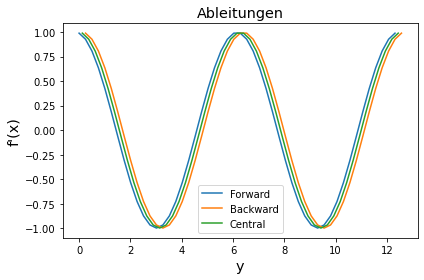

Der Fehler im Forward beträgt 0.08960240840718171
Der Fehler im Backward beträgt 0.08960240840718176
Der Fehler im Central beträgt 0.00187844087678339


In [4]:
plt.title("Ableitungen", size="x-large")
plt.ylabel("f'(x)", size="x-large")
plt.xlabel("y", size="x-large")
plt.plot(x_forward, forward_difference, label="Forward")
plt.plot(x_backward, backward_difference, label="Backward")
plt.plot(x_central, central_difference, label="Central")
plt.legend()
plt.tight_layout()
plt.show()

error_forward = np.std(forward_difference - np.cos(x_forward), ddof=1)
error_backward = np.std(backward_difference - np.cos(x_backward), ddof=1)
error_central = np.std(central_difference - np.cos(x_central), ddof=1)

print(f"Der Fehler im Forward beträgt {error_forward}")
print(f"Der Fehler im Backward beträgt {error_backward}")
print(f"Der Fehler im Central beträgt {error_central}")

Der Fehler, evaluiert hier als die Standardabweichung, ist gleich groß bei dem Vorwärts- und Rückwärtsdifferenzenquotienten (nicht weiter verwunderlich) aber wesentlich größer im Vergleich zu dem Fehler bei dem zentralen Differenzenquotienten.

Eine exakte Analyse (das machen wir hier nicht) würde ergeben, dass der Fehler bei der erstgenannten Art der Differenzenbildung mindestents linear von der Schrittweite abhängt. Sie können also den Fehler um den Faktor zwei reduzieren, wenn Sie die Schrittweite halbieren.

Eine exakte Analyse würde außerdem ergeben, dass der Fehler bei der zweitgenannten Art der Differenzenbildung mindestents quadratisch von der Schrittweite abhängt. Sie können also den Fehler um den Faktor vier reduzieren, wenn Sie die Schrittweite halbieren!

Das wollen wir im Folgenden evaluieren (exemplarisch an dem konkreten Beispiel). Wir evaluieren hier nur den Fehler des Vorwärtsdifferenzenoperators. Zur Quantisierung des Fehlers benutzen wir die Standardabweichung der Differenz.

In [5]:
error_forward = []
error_central = []
resolution = []

for N in range(10, 510, 10):    # Wir lassen hier also de facto einfach eine Schleife durchlaufen, in der wir die
                                # Anzahl der Stützstellen ändern, mit denen wir ein vorhandenes Interval 
                                # diskretisieren. Das inverse dieser Zahl wäre eine Maßzahl für die Diskretisierung.
    x = np.linspace(a, b, N)
    y = np.sin(x)
    forward_difference = (y[1:] - y[:-1]) / (x[1] - x[0])
    x_forward = x[:-1]
    backward_difference = (y[1:] - y[:-1]) / (x[1] - x[0])
    x_backward = x[1:]
    central_difference = (forward_difference + backward_difference) / 2
    x_central = (x_forward + x_backward) / 2
    error_forward.append(np.std(forward_difference - np.cos(x_forward), ddof=1))    # Mit dem Befehl append hängen Sie
                                                                                    # ein neues Element an eine Liste an. 
    error_central.append(np.std(central_difference - np.cos(x_central), ddof=1))
    resolution.append(N)
resolution = np.asarray(resolution)         # Der Befehl konvertiert die Eingabe in einer Liste, die äquivalent zu
                                            # einer von NumPy erzeugten Liste ist. 

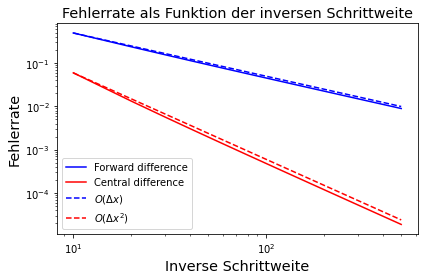

In [6]:
plt.plot(resolution, error_forward, "b-", label="Forward difference")
plt.plot(resolution, error_central, "r-", label="Central difference")
plt.plot(
    resolution,
    resolution[0] * error_forward[0] / resolution,
    "b--",
    label=r"$O(\Delta x)$",
)
plt.plot(
    resolution,
    resolution[0] ** 2 * error_central[0] / resolution**2,
    "r--",
    label=r"$O(\Delta x^2)$",
)
plt.xscale("log")
plt.yscale("log")
plt.title("Fehlerrate als Funktion der inversen Schrittweite", size="x-large")
plt.ylabel("Fehlerrate", size="x-large")
plt.xlabel("Inverse Schrittweite", size="x-large")
plt.legend()
plt.tight_layout()
plt.show()

Dieses Verfahren lässt sich noch weiter verbessern, indem man weitere Operatoren hinzufügt, die den Differentialquotienten immer besser annähern. Man benötigt dann lediglich mehr Stützstellen zur Berechnung. Den quadratischen Fehlerterm kann man eliminieren durch die folgende Näherung:
$$
\frac{\mathrm{d} f}{\mathrm{d} x}\approx\frac{1}{12 \Delta x}\left[-f(x+2\Delta x)+8f(x+\Delta x)-8f(x-\Delta x)+f(x-2\Delta x)\right]
$$
Hier approximiert man den Differentialoperator mit einem Differenzenoperator, bei dem der Fehler mindestens quartisch mit der Schrittweite reduziert wird. Das heißt, bei einer Halbierung der Schrittweite reduziert sich der Fehler um den Faktor sechzehn. Sie können das beliebig verfeinern.

### Ableitungen zweiter Ordnung

Die Berechnung einer Ableitung zweiter Ordnung verlangt die diskrete Berechnung der Änderung der Änderung eines Funktionswertes. Mit dem oben bereits eingeführten Vorwärts- und Rückwärtsdifferenzenquotienten ist dies sehr einfach, da wir lediglich die Änderug dieser Quotienten noch einmal berechnen müssen.

Im Speziellen haben wir:

$$
\frac{\mathrm{d}^2 f(x)}{\mathrm{d}x^2}\approx \frac{\frac{\Delta f_1}{\Delta x}-\frac{\Delta f_2}{\Delta x}}{\Delta x}
\approx \frac{f_3-f_2-f_2+f_1}{\Delta x^2}\approx \frac{f(x+\Delta x)-2f(x)+f(x-\Delta x)}{\Delta x^2}
$$

Dieser Differenzenoperator konvergiert in zweiter Ordnung mit der Schrittweite. Halbierung der Schrittweite reduziert den Fehler mindestens um den Faktor vier. 

In [7]:
error_second_order_difference = []
resolution = []
a = 0
b = 4 * np.pi

for N in range(10, 510, 10):
    x = np.linspace(a, b, N)
    h = x[1] - x[0]

    xplush = x + h
    xminush = x - h

    second_order_difference = (
        1 / (h**2) * (np.sin(xminush) - 2 * np.sin(x) + np.sin(xplush))
    )
    error_second_order_difference.append(
        np.std(second_order_difference + np.sin(x), ddof=1)
    )
    resolution.append(N)
resolution = np.asarray(resolution)

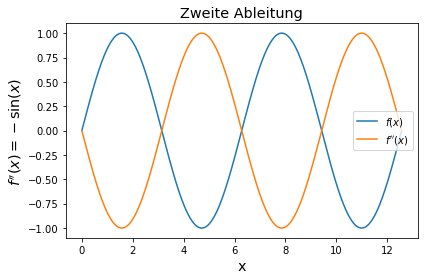

In [8]:
plt.title("Zweite Ableitung", size="x-large")
plt.plot(x, np.sin(x), label=r"$f(x)$")
plt.plot(x, second_order_difference, label=r"$f''(x)$")
plt.ylabel(r"$f''(x)=-\sin(x)$", size="x-large")
plt.xlabel("x", size="x-large")
plt.legend()
plt.tight_layout()
plt.show()

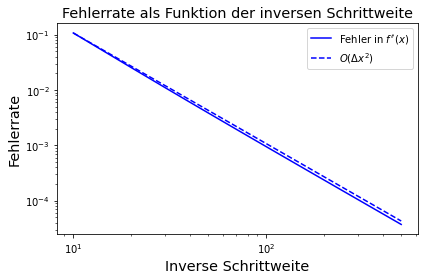

In [9]:
plt.plot(resolution, error_second_order_difference, "b-", label=r"Fehler in $f''(x)$")
plt.plot(
    resolution,
    resolution[0] ** 2 * error_second_order_difference[0] / resolution**2,
    "b--",
    label=r"$O(\Delta x^2)$",
)
plt.xscale("log")
plt.yscale("log")
plt.title("Fehlerrate als Funktion der inversen Schrittweite", size="x-large")
plt.ylabel("Fehlerrate", size="x-large")
plt.xlabel("Inverse Schrittweite", size="x-large")
plt.legend()
plt.tight_layout()
plt.show()